# Import libraries and datasets

In [1]:
import pandas as pd
import pickle as pkl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings

In [2]:
with open('../data/modeling_data.pkl','rb') as f:
    df = pkl.load(f)
    
irt = pd.read_csv('../data/irt_ridership.csv')

#  Correlation of all features to delays

In [3]:
features_df = df[['delayed_irt', 'bronx', 'brooklyn', 'manhattan', 'queens', 'direction_bronx', 'direction_brooklyn', 'direction_manhattan',
                   'direction_queens', 'direction_unspecified', 'causes_other', 'causes_passenger', 'causes_station', 'causes_train',
                  'causes_weather', 'rush_hour', 'mon', 'tue', 'wed', 'th', 'fri', 'weekend', 'max_temp', 'avg_temp', 'min_temp',
                  'avg_wind_spd', 'fastest_wind_spd', 'major_conditions', 'minor_conditions', 'neutral_conditions', 'clear_conditions',
                  'prcp', 'snowfall', 'snowfall_depth']]

In [4]:
stations_df = df[['delayed_irt','103 st (1)', '103 st (6)', '103 st-corona plza (7)', '110 st (6)', '111 st (7)',
                  '116 st (2/3)', '116 st (6)', '116 st-columbia (1)', '125 st (2/3)', '125 st (4/5/6)',
                  '135 st (2/3)', '137 st-city clg (1)', '138 st-grand concourse (4/5)', '14 st-7 av (1/2/3/F/L/M)',
                  '14 st-union sq (4/5/6/L/N/Q/R/W)', '145 st (1)', '145 st (3)', '149 st-grand concourse (2/4/5)',
                  '157 st (1)', '161 st-yankee stdm (4/B/D)', '167 st (4)', '168 st-broadway (1/A/C)', '170 st (4)',
                  '174 st (2/5)', '176 st (6)', '18 st (1)', '181 st (1)', '183 st (4)', '191 st (1)', '207 st (1)',
                  '215 st (1)', '219 st (2/5)', '225 st (2/5)', '23 st (1)', '23 st (6)', '231 st (1)', '233 st (2/5)',
                   '238 st (1)', '28 st (1)', '28 st (6)', '3 av-138 st (6)', '3 av-149 st (2/5)', '33 st (6)',
                  '33 st-rawson st (7)', '34 st-hudson yd (7)', '34 st-penn sta (1/2/3/A/C/E)', '40 st-lowery st (7)',
                  '42 st bryant pk-5 av (7/B/D/F/M)', '46 st-bliss st (7)', '50 st (1)', '52 st-lincoln (7)',
                   'lexington av-59 st (4/5/6/N/Q/R/W)', '59 st-columbus cr (1/A/B/C/D)', '61 st-woodside (7)',
                  '66 st-lincoln ctr (1)', '68 st-hunter clg (6)', '69 st-fisk av (7)', '72 st (1/2/3)',
                  '77 st (6)', '79 st (1)', '82 st-jackson hts (7)', '86 st (1)', '86 st (4/5/6)', '90 st-elmhurst (7)',
                   '96 st (1/2/3)', '96 st (6)', 'allerton av (2/5)', 'astor pl (6)', 'atlantic av-barclays ctr (2/3/4/5/B/D/N/Q/R)',
                  'baychester av (5)', 'bedford pk blvd (4)', 'bergen st (2/3)', 'beverly rd (2/5)', 'borough hall-court st (2/3/4/5/R)',
                  'bowling green (4/5)', 'broadway-lafayette/bleecker st (6/B/D/F/Q)', 'bronx pk east (2/5)', 'brook av (6)',
                   'brooklyn bridge-city hall (4/5/6/J/Z)', 'buhre av (6)', 'burke av (2/5)', 'burnside av (4)', 'canal st (1)',
                  'canal st (6/J/N/Q/R/W/Z)', 'castle hill av (6)', 'cathedral pkwy-110 st (1)', 'chambers st-wtc (1/2/3/A/C/E/R/W)',
                  'christopher st (1)', 'church av (2/5)', 'clark st (2/3)', 'court sq (7)', 'crown hts-utica av (3/4)', 'ctl park n-110 st (2/3)',
                  'cypress av (6)', 'dyckman st (1)', 'e 143 st (6)', 'e 149 st (6)', 'e 180 st (2/5)', 'eastchester dyre av (5)',
                  'eastern pkwy (2/3)', 'elder av (6)', 'flatbush av-bk clg (2/5)', 'flushing-main st (7)', 'fordham rd (4)',
                  'franklin av (2/3/4/5/S)', 'franklin st (1)', 'freeman st (2/5)', 'fulton st (2/3/4/5/A/C/J/Z)', 'grand army plza (2/3)',
                  'grand ctl-42 st (4/5/6/7)', 'gun hill rd (2/5)', 'gun hill rd (5)', 'harlem-148 st (3)', 'houston st (1)', 'hoyt st (2/3)',
                   'hunters pt (7)', 'hunts pt av (6)', 'intervale av (2/5)', 'jackson av (2/5)', 'jackson hts-roosevelt av (7/E/F/M/R)',
                  'junction blvd (7)', 'junius st (3)', 'kingsbridge rd (4)', 'kingston av (4)', 'lexington av-53 st (6/E/M)', 'longwood av (6)',
                   'marble hill-225 st (1)', 'mets-willets pt (7)', 'middletown rd (6)', 'morris pk (5)', 'morrison av (6)',
                  'moshulu pkwy (4)','mt eden av (4)', 'nereid av (2/5)', 'nevins st (2/3/4/5)', 'new lots av (3)', 'newkirk av (2/5)',
                   'nostrand av (3)', 'park pl (2/3/A/C/E)', 'parkchester (6)', 'pelham bay pk (6)', 'pelham pkwy (2/5)', 'pelham pkwy (5)',
                  'pennsylvania av (3)', 'president st (2/5)', 'prospect av (2/5)', 'queensboro plza (7/N/Q/W)', 'rector st (1)', 'rockaway av (3)',
                  'saratoga av (3)', 'simpson st (2/5)', 'south ferry (1/R/W)', 'spring st (6)', 'st lawrence av (6)', 'sterling st (2/5)',
                  'sutter av (3)', 'times sq-42 st (1/2/3/7/A/C/E/N/Q/R/S)', 'van cortlandt park-242 st (1)', 'van siclen av (3)',
                  'vernon-jackson (7)', 'wakefield-241 st (2)', 'wall st (2/3)', 'wall st (4/5)', 'west farm sq-e tremont (2/5)', 'westchester sq (6)',
                  'whitlock av (6)', 'winthrop st (2/5)', 'woodlawn (4)', 'zerega av (6)']]

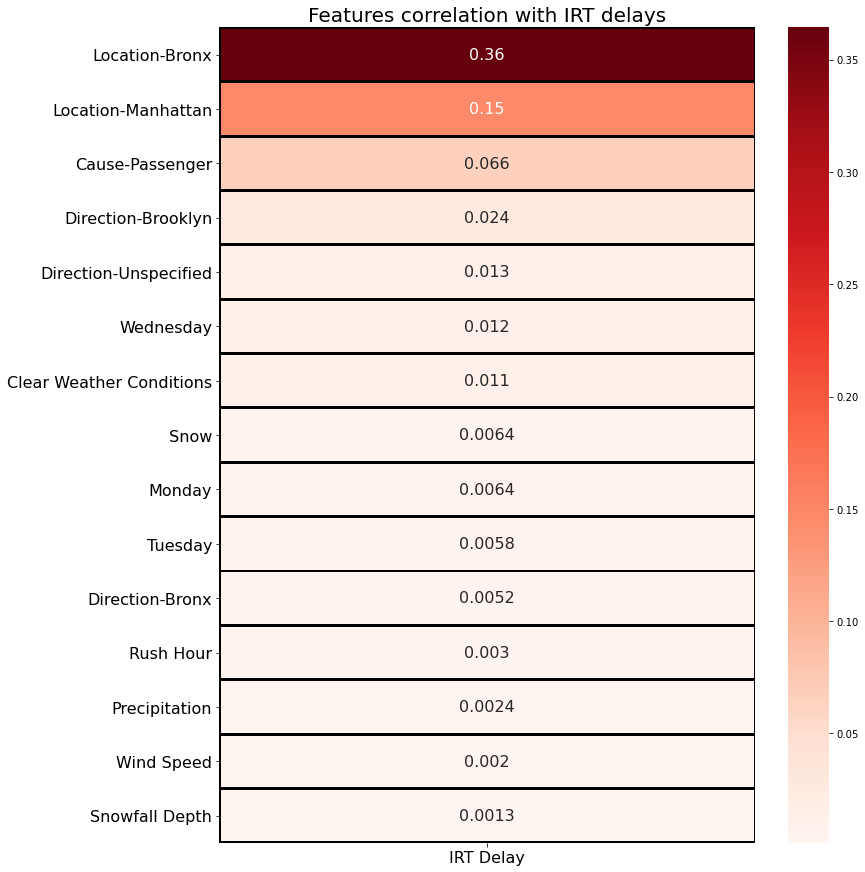

In [5]:
y_labels = ['Location-Bronx','Location-Manhattan','Cause-Passenger','Direction-Brooklyn','Direction-Unspecified',
           'Wednesday','Clear Weather Conditions',' Snow','Monday','Tuesday','Direction-Bronx',
           'Rush Hour','Precipitation','Wind Speed','Snowfall Depth']
corr = features_df.corr().drop(['delayed_irt'])
x=corr[['delayed_irt']]
fig, ax = plt.subplots(figsize=(12,15))
sns.heatmap(x.sort_values(by=['delayed_irt'],ascending=0)[:15],
           annot=True,
           cmap='Reds',
           annot_kws={'fontsize':16},
           linewidth=2,
           linecolor='black',
           yticklabels=y_labels,
           xticklabels=['IRT Delay']);
ax.set_title('Features correlation with IRT delays',size=20)
ax.tick_params(labelsize=16)

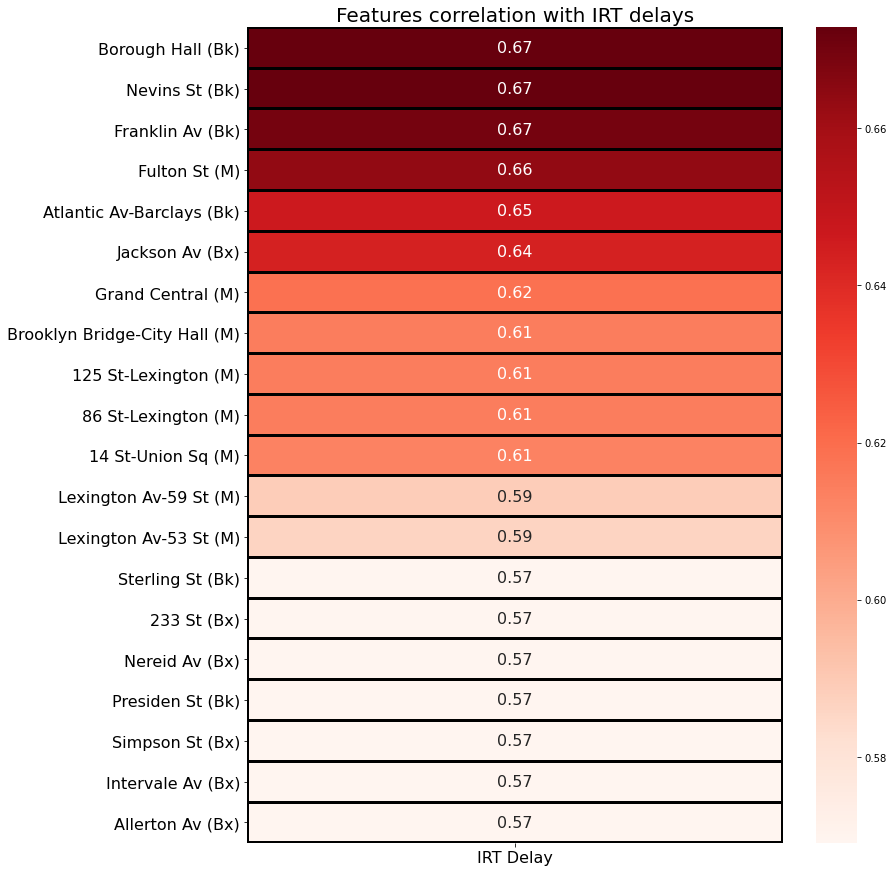

In [6]:
y_labels = ['Borough Hall (Bk)','Nevins St (Bk)','Franklin Av (Bk)','Fulton St (M)',
           'Atlantic Av-Barclays (Bk)','Jackson Av (Bx)', 'Grand Central (M)','Brooklyn Bridge-City Hall (M)',
           '125 St-Lexington (M)','86 St-Lexington (M)','14 St-Union Sq (M)','Lexington Av-59 St (M)',
           'Lexington Av-53 St (M)', 'Sterling St (Bk)','233 St (Bx)', 'Nereid Av (Bx)','Presiden St (Bk)',
           'Simpson St (Bx)','Intervale Av (Bx)','Allerton Av (Bx)']

corr = stations_df.corr().drop(['delayed_irt'])
x=corr[['delayed_irt']]
fig, ax = plt.subplots(figsize=(12,15))
sns.heatmap(x.sort_values(by=['delayed_irt'],ascending=0)[:20],
           annot=True,
           cmap='Reds',
           annot_kws={'fontsize':16},
           linewidth=2,
           linecolor='black',
           yticklabels=y_labels,
           xticklabels=['IRT Delay']);
ax.set_title('Features correlation with IRT delays',size=20)
ax.tick_params(labelsize=16)

# Looking at different features

## Causes

In [7]:
causes = df[['delayed_irt','causes_other','causes_passenger', 'causes_station', 'causes_train', 'causes_weather']]
causes = causes.loc[causes['delayed_irt']==1]
causes.drop('delayed_irt',axis=1,inplace=True)

<ipython-input-8-422f595939fd>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0%', 10, 20, 30, 40, '50%'],fontsize=15)


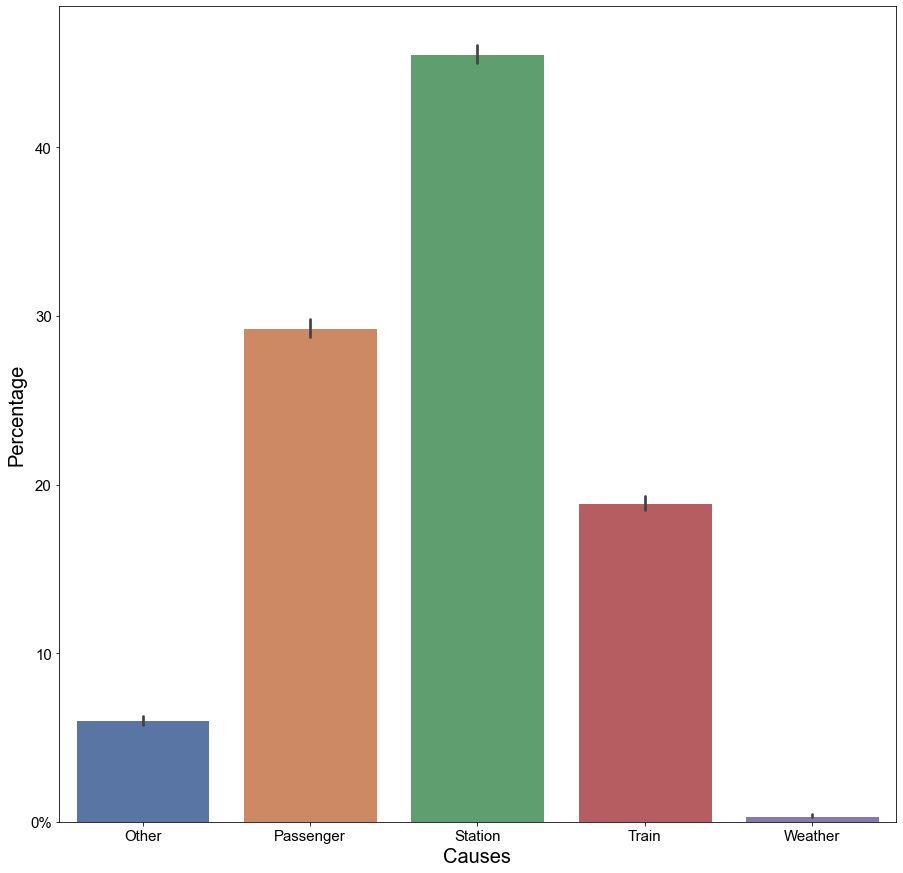

In [8]:
fig, ax = plt.subplots(figsize=(15,15))
sns.set_theme()
ax = sns.barplot(data=causes)
ax.set_xticklabels(['Other','Passenger','Station','Train','Weather'],fontsize=15)
ax.set_yticklabels(['0%', 10, 20, 30, 40, '50%'],fontsize=15)
ax.set_xlabel('Causes',fontsize=20)
ax.set_ylabel('Percentage',fontsize=20);

## Weather

In [9]:
weather_cond = df[['delayed_irt','major_conditions', 'minor_conditions', 'neutral_conditions', 'clear_conditions']]
weather_cond = weather_cond.loc[weather_cond['delayed_irt']==1]
weather_cond.drop('delayed_irt',axis=1,inplace=True)

<ipython-input-10-193fc5fc9038>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0%', 10, 20, 30, 40, 50, '60%'],fontsize=15)


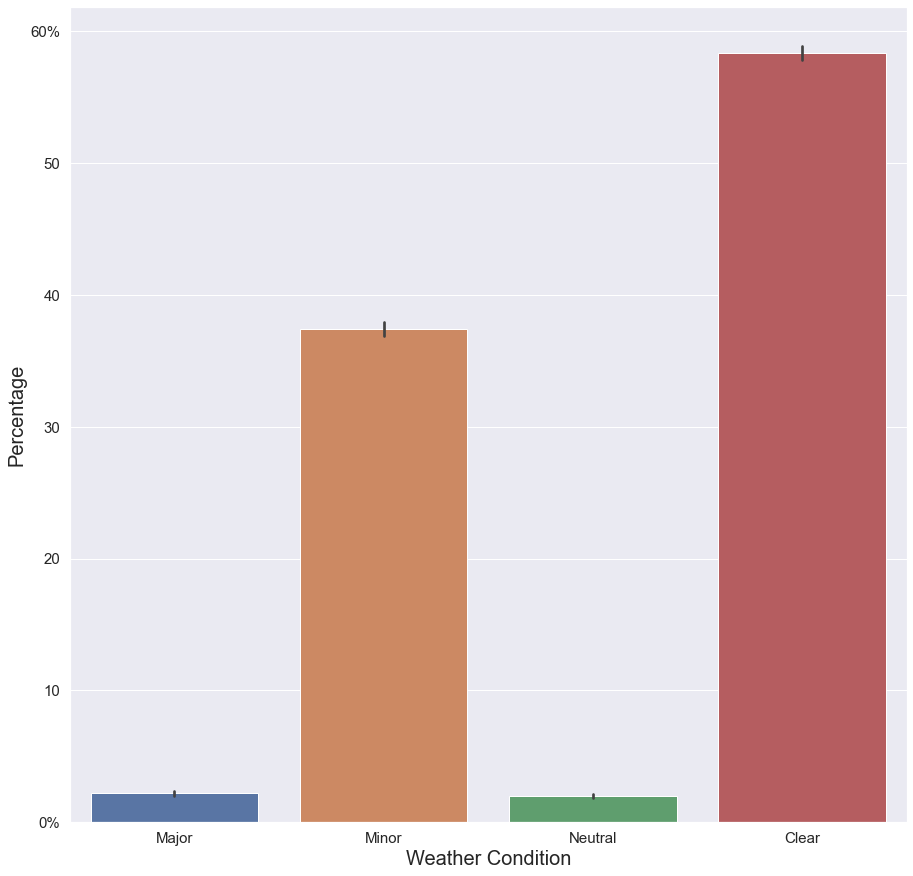

In [10]:
fig, ax = plt.subplots(figsize=(15,15))
sns.set_theme()
ax = sns.barplot(data=weather_cond)
ax.set_xticklabels(['Major','Minor','Neutral','Clear'],fontsize=15)
ax.set_yticklabels(['0%', 10, 20, 30, 40, 50, '60%'],fontsize=15)
ax.set_xlabel('Weather Condition',fontsize=20)
ax.set_ylabel('Percentage',fontsize=20);

## Day of Week

In [11]:
day = df[['delayed_irt','mon','tue','wed','th','fri','weekend']]
day = day.loc[day['delayed_irt']==1]
day.drop('delayed_irt',axis=1,inplace=True)

<ipython-input-12-adfafa6391ff>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0%',2.5,5,7.5,10,12.5,15,17.5,'20%'],fontsize=15)


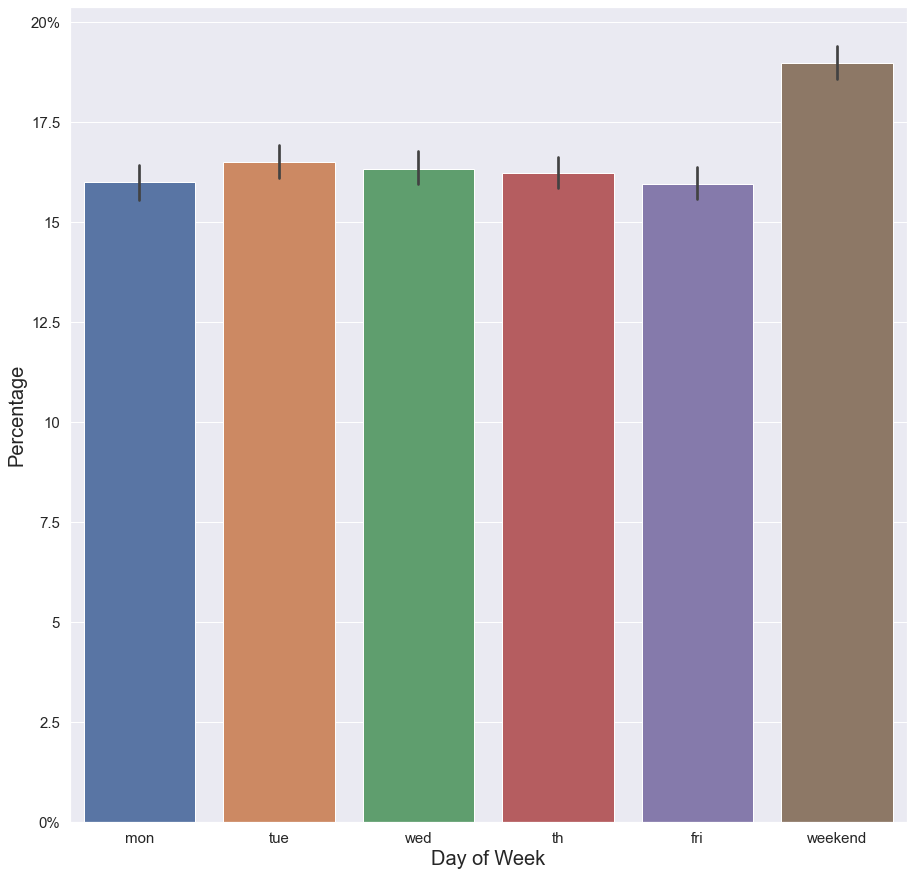

In [12]:
fig, ax = plt.subplots(figsize=(15,15))
sns.set_theme()
ax = sns.barplot(data=day)
ax.set_xticklabels(['mon','tue','wed','th','fri','weekend'],fontsize=15)
ax.set_yticklabels(['0%',2.5,5,7.5,10,12.5,15,17.5,'20%'],fontsize=15)
ax.set_xlabel('Day of Week',fontsize=20)
ax.set_ylabel('Percentage',fontsize=20);

## Borough

In [13]:
boro = df[['delayed_irt','bronx','brooklyn','manhattan','queens']]
boro = boro.loc[boro['delayed_irt']==1]
boro.drop('delayed_irt',axis=1,inplace=True)

<ipython-input-14-40ac59f1191a>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0%',10,20,30,40,'50%'],fontsize=15)


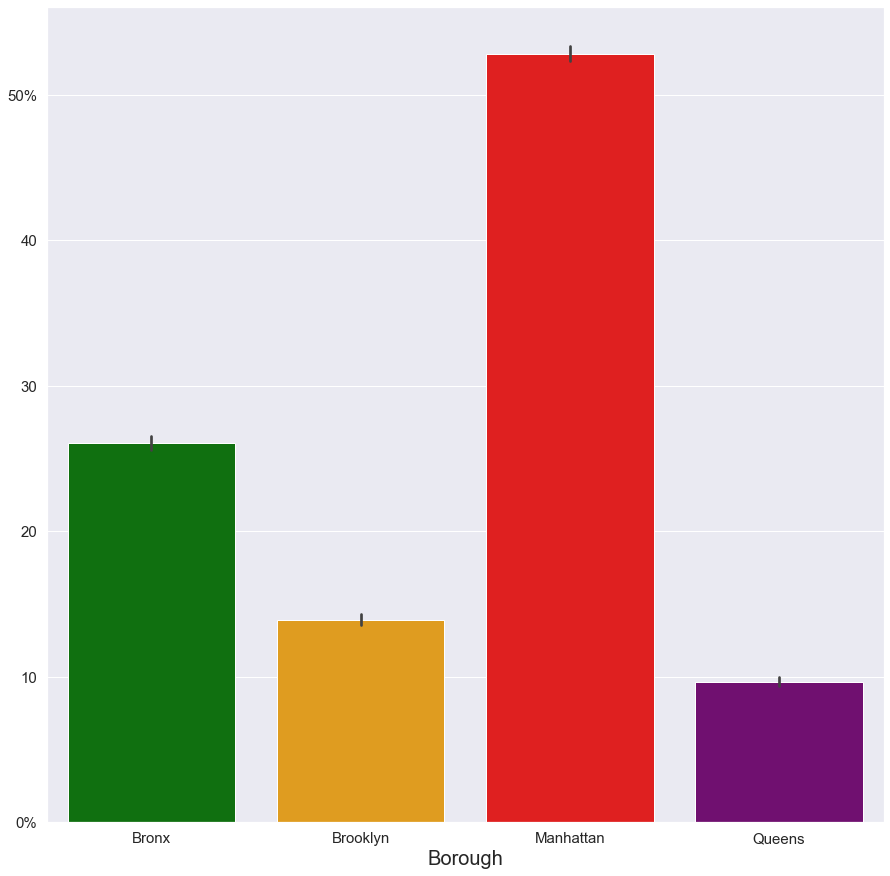

In [14]:
fig, ax = plt.subplots(figsize=(15,15))
sns.set_theme()
ax = sns.barplot(data=boro,palette=['green','orange','red','purple'])
ax.set_xticklabels(['Bronx','Brooklyn','Manhattan','Queens'],fontsize=15)
ax.set_yticklabels(['0%',10,20,30,40,'50%'],fontsize=15)
ax.set_xlabel('Borough',fontsize=20);

## Rush Hour

In [15]:
rh = df[['delayed_irt','rush_hour']]
rh = rh.loc[rh['delayed_irt']==1]
rh.drop('delayed_irt',axis=1,inplace=True)

In [16]:
rhdf = pd.DataFrame(rh.value_counts(),columns=['ct'])
rhdf.reset_index(inplace=True)
rhdf['rush_hour'].loc[rhdf['rush_hour']==0] = 'Not Rush Hour'
rhdf['rush_hour'].loc[rhdf['rush_hour']==1] = 'Rush Hour'
rhdf.set_index('rush_hour',inplace=True)

C:\Users\sethk\anaconda3\envs\learn-env\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


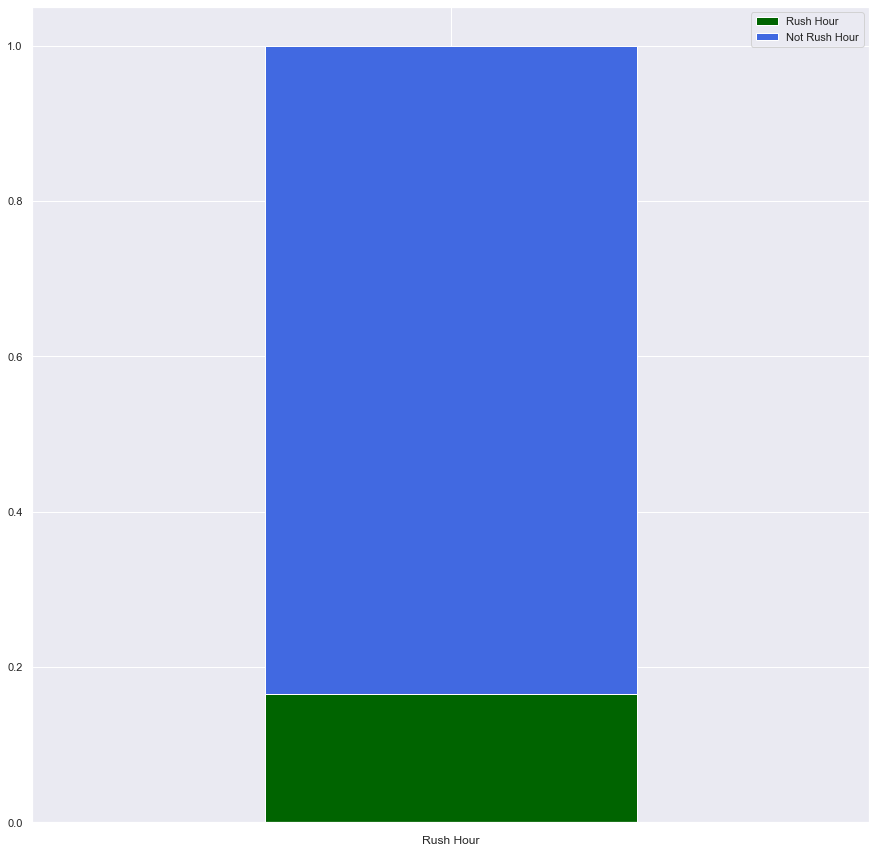

In [17]:
x = rhdf.index
y = [x[0]/sum(rhdf.values) for x in rhdf.values]

d = {x[val]:y[val] for val in range(0,len(x))}
d_sort = pd.DataFrame(dict(sorted(d.items(),key=lambda x:x[1])),index=[''])

sns.color_palette('rocket',as_cmap=True)

d_sort.plot(kind='bar',stacked=True,color=['darkgreen','royalblue'],
            xlabel='Rush Hour',width=.4,figsize=(15,15));

## Worst Stations

In [18]:
stations = df[['delayed_irt','103 st (1)', '103 st (6)', '103 st-corona plza (7)', '110 st (6)', '111 st (7)', '116 st (2/3)',
                '116 st (6)', '116 st-columbia (1)', '125 st (2/3)', '125 st (4/5/6)', '135 st (2/3)', '137 st-city clg (1)',
               '138 st-grand concourse (4/5)', '14 st-7 av (1/2/3/F/L/M)', '14 st-union sq (4/5/6/L/N/Q/R/W)', '145 st (1)',
               '145 st (3)', '149 st-grand concourse (2/4/5)', '157 st (1)', '161 st-yankee stdm (4/B/D)', '167 st (4)',
               '168 st-broadway (1/A/C)', '170 st (4)', '174 st (2/5)', '176 st (6)', '18 st (1)', '181 st (1)', '183 st (4)',
                '191 st (1)', '207 st (1)', '215 st (1)', '219 st (2/5)', '225 st (2/5)', '23 st (1)', '23 st (6)', '231 st (1)',
               '233 st (2/5)', '238 st (1)', '28 st (1)', '28 st (6)', '3 av-138 st (6)', '3 av-149 st (2/5)', '33 st (6)',
               '33 st-rawson st (7)', '34 st-hudson yd (7)', '34 st-penn sta (1/2/3/A/C/E)', '40 st-lowery st (7)', '42 st bryant pk-5 av (7/B/D/F/M)',
               '46 st-bliss st (7)', '50 st (1)', '52 st-lincoln (7)', 'lexington av-59 st (4/5/6/N/Q/R/W)', '59 st-columbus cr (1/A/B/C/D)',
                '61 st-woodside (7)', '66 st-lincoln ctr (1)', '68 st-hunter clg (6)', '69 st-fisk av (7)', '72 st (1/2/3)',
               '77 st (6)', '79 st (1)', '82 st-jackson hts (7)', '86 st (1)', '86 st (4/5/6)', '90 st-elmhurst (7)',
               '96 st (1/2/3)', '96 st (6)', 'allerton av (2/5)', 'astor pl (6)', 'atlantic av-barclays ctr (2/3/4/5/B/D/N/Q/R)',
               'baychester av (5)', 'bedford pk blvd (4)', 'bergen st (2/3)', 'beverly rd (2/5)', 'borough hall-court st (2/3/4/5/R)',
               'bowling green (4/5)', 'broadway-lafayette/bleecker st (6/B/D/F/Q)', 'bronx pk east (2/5)', 'brook av (6)',
               'brooklyn bridge-city hall (4/5/6/J/Z)', 'buhre av (6)', 'burke av (2/5)', 'burnside av (4)', 'canal st (1)',
               'canal st (6/J/N/Q/R/W/Z)', 'castle hill av (6)', 'cathedral pkwy-110 st (1)', 'chambers st-wtc (1/2/3/A/C/E/R/W)',
               'christopher st (1)', 'church av (2/5)', 'clark st (2/3)', 'court sq (7)', 'crown hts-utica av (3/4)',
               'ctl park n-110 st (2/3)', 'cypress av (6)', 'dyckman st (1)', 'e 143 st (6)', 'e 149 st (6)', 'e 180 st (2/5)',
               'eastchester dyre av (5)', 'eastern pkwy (2/3)', 'elder av (6)', 'flatbush av-bk clg (2/5)', 'flushing-main st (7)',
               'fordham rd (4)', 'franklin av (2/3/4/5/S)', 'franklin st (1)', 'freeman st (2/5)', 'fulton st (2/3/4/5/A/C/J/Z)',
               'grand army plza (2/3)', 'grand ctl-42 st (4/5/6/7)', 'gun hill rd (2/5)', 'gun hill rd (5)', 'harlem-148 st (3)',
               'houston st (1)', 'hoyt st (2/3)', 'hunters pt (7)', 'hunts pt av (6)', 'intervale av (2/5)',
               'jackson av (2/5)', 'jackson hts-roosevelt av (7/E/F/M/R)', 'junction blvd (7)', 'junius st (3)', 'kingsbridge rd (4)',
               'kingston av (4)', 'lexington av-53 st (6/E/M)', 'longwood av (6)', 'marble hill-225 st (1)', 'mets-willets pt (7)',
               'middletown rd (6)', 'morris pk (5)', 'morrison av (6)', 'moshulu pkwy (4)', 'mt eden av (4)',
               'nereid av (2/5)', 'nevins st (2/3/4/5)', 'new lots av (3)', 'newkirk av (2/5)', 'nostrand av (3)', 'park pl (2/3/A/C/E)',
               'parkchester (6)', 'pelham bay pk (6)', 'pelham pkwy (2/5)', 'pelham pkwy (5)', 'pennsylvania av (3)', 'president st (2/5)',
                'prospect av (2/5)', 'queensboro plza (7/N/Q/W)', 'rector st (1)', 'rockaway av (3)', 'saratoga av (3)', 'simpson st (2/5)',
               'south ferry (1/R/W)', 'spring st (6)', 'st lawrence av (6)', 'sterling st (2/5)', 'sutter av (3)', 'times sq-42 st (1/2/3/7/A/C/E/N/Q/R/S)',
               'van cortlandt park-242 st (1)', 'van siclen av (3)', 'vernon-jackson (7)', 'wakefield-241 st (2)',
               'wall st (2/3)', 'wall st (4/5)', 'west farm sq-e tremont (2/5)', 'westchester sq (6)',
               'whitlock av (6)', 'winthrop st (2/5)', 'woodlawn (4)', 'zerega av (6)']]

In [19]:
stations = stations.loc[stations['delayed_irt']==1]
stations.drop('delayed_irt',axis=1,inplace=True)

In [20]:
y = []
for col in stations:
    y.append(sum(stations[col]))
    
x = stations.columns

d = {x[val]:y[val] for val in range(0,len(x))}
d_sort = pd.DataFrame(dict(sorted(d.items(),key=lambda x:x[1])),index=[''])
d_sort['median'] = d_sort.median(axis=1)
top_5 = d_sort.iloc[:,-6:-1]

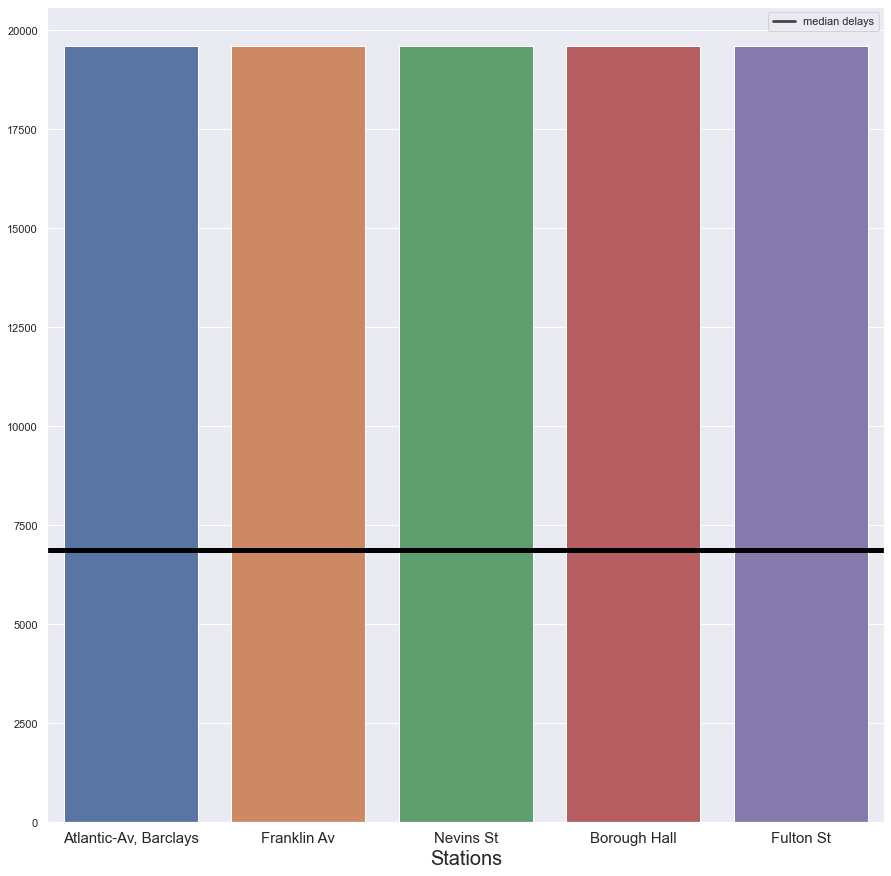

In [21]:
fig, ax = plt.subplots(figsize=(15,15))
sns.set_theme()
sns.barplot(data=top_5).axhline(d_sort['median'].median(),linewidth=5,color='black')
ax.set_xticklabels(['Atlantic-Av, Barclays','Franklin Av','Nevins St',
                    'Borough Hall','Fulton St'],fontsize=15)
ax.set_xlabel('Stations',fontsize=20)
leg = ax.legend(labels=['median delays']);

# Ridership Data EDA

In [22]:
irt.rename({'Boro':'boro'},axis=1,inplace=True)

In [23]:
irt

,station,boro,2015,2016,2017,2018,2019,2020,mean
0,103 st (1),M,4258632,4290142,4114291,4072703,3766055,1470254.00,4394415.400
1,103 st (6),M,4031201,4336922,4402069,4065523,4039570,1851275.00,4545312.000
2,103 st-corona plza (7),Q,6527196,6504644,6498237,6319564,6399657,3311294.00,7112118.400
3,110 st (6),M,4209449,4196711,3734660,3394176,3316061,1468769.89,4063965.378
4,111 st (7),Q,3699843,3753756,3721445,3608389,3836999,2119769.97,4148040.394
...,...,...,...,...,...,...,...,...,...
167,woodlawn (4),Bx,2418890,2380900,2242100,2160859,2094285,949554.00,2449317.600
168,61 st-woodside (7),Q,5432682,5511564,5457171,5282486,5345369,2391082.99,5884070.998
169,wtc-cortlandt (1),M,0,0,0,1245455,4232521,1138814.93,1323358.186
170,zerega av (6),Bx,492883,784314,799739,792928,795756,361498.96,805423.792


## Manhattan

In [24]:
manh_df = irt.loc[irt['boro']=='M']
manh_df['median'] = manh_df[['2015','2016','2017','2018','2019','2020']].median(axis=1)
top_manh = manh_df.sort_values('mean',ascending=False)[:10]
top_manh = top_manh[['station','mean']]
warnings.filterwarnings('ignore')

<ipython-input-24-e9e573a634ee>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  manh_df['median'] = manh_df[['2015','2016','2017','2018','2019','2020']].median(axis=1)


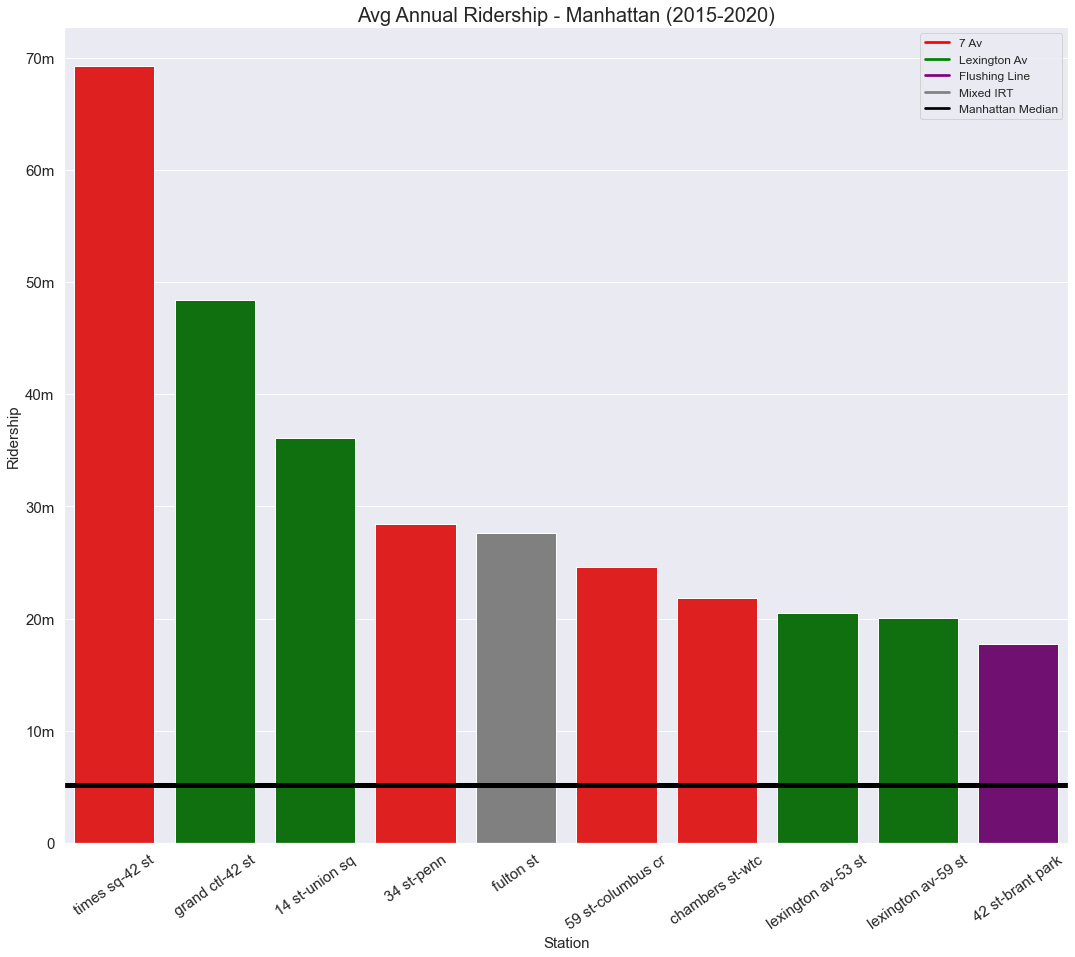

In [25]:
means_manh = top_manh[['station','mean']]

fig, ax = plt.subplots(figsize=(18, 15))

x = means_manh['station']
y = means_manh['mean']

sns.set_theme()
sns.barplot(x = x,y = y,palette=['red','green','green','red','gray','red','red','green','green','purple']).axhline(
manh_df['median'].median(),linewidth=5,color='black')
ax.set_yticklabels(['0','10m','20m','30m','40m','50m','60m','70m'],fontsize=15)
ax.set_xticklabels(['times sq-42 st', 'grand ctl-42 st','14 st-union sq','34 st-penn','fulton st',
                    '59 st-columbus cr','chambers st-wtc','lexington av-53 st','lexington av-59 st','42 st-brant park'],
                    fontsize=15,rotation=35)
ax.set_title('Avg Annual Ridership - Manhattan (2015-2020)',fontsize=20)
ax.set_xlabel('Station',fontsize=15)
ax.set_ylabel('Ridership',fontsize=15)
leg = ax.legend(labels=['7 Av','Lexington Av','Flushing Line','Mixed IRT','Manhattan Median'],loc='upper right',fontsize=12);
leg.legendHandles[0].set_color('red')
leg.legendHandles[1].set_color('green')
leg.legendHandles[2].set_color('purple')
leg.legendHandles[3].set_color('gray')
leg.legendHandles[4].set_color('black')
plt.show();

## Brooklyn

In [26]:
bk_df = irt.loc[irt['boro']=='B']
bk_df['median'] = bk_df[['2015','2016','2017','2018','2019','2020']].median(axis=1)
top_bk = bk_df.sort_values('mean',ascending=False)[:10]
top_bk = top_bk[['station','mean']]
warnings.filterwarnings('ignore')

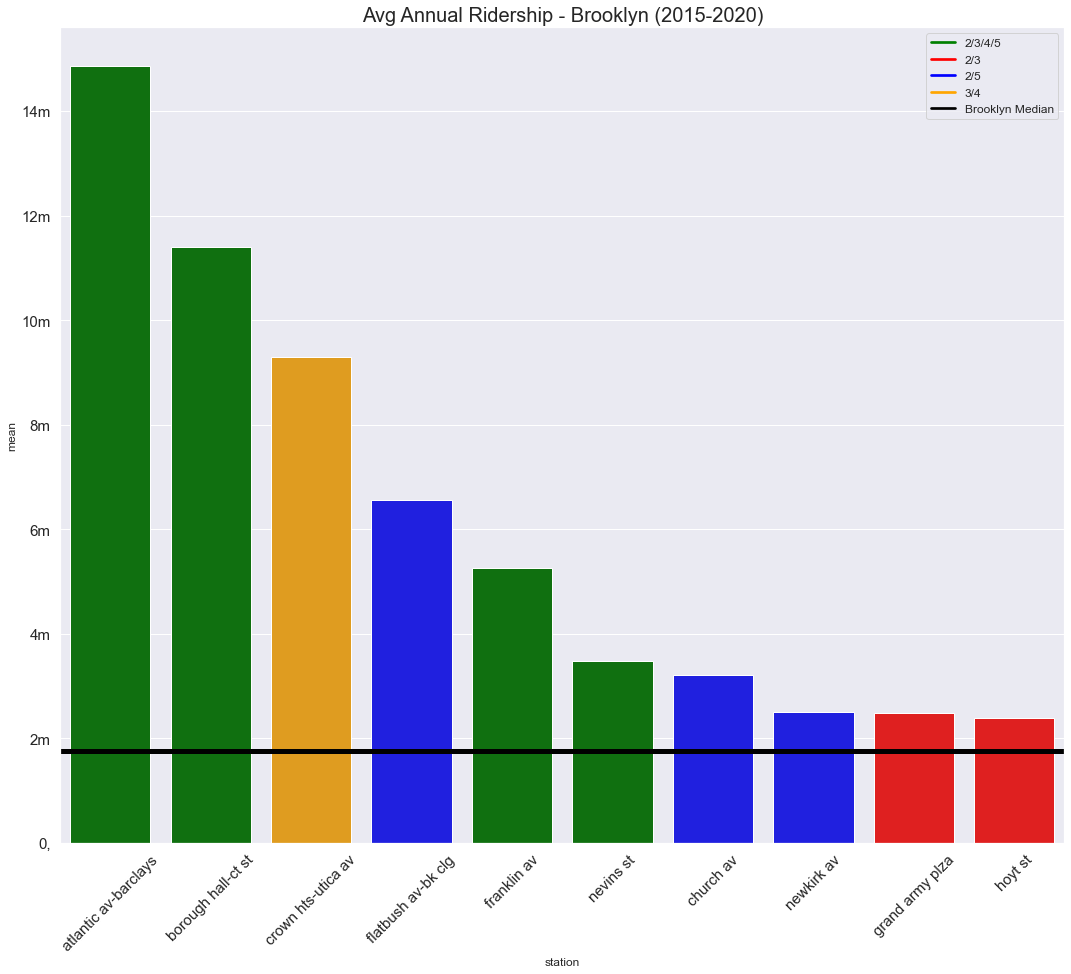

In [27]:
means_bk = top_bk[['station','mean']]

fig, ax = plt.subplots(figsize=(18, 15))

x = means_bk['station']
y = means_bk['mean']

sns.set_theme()
sns.barplot(x = x,y = y,palette=['green','green','orange','blue','green','green','blue','blue','red','red']).axhline(
bk_df['median'].median(),linewidth=5,color='black')
ax.set_yticklabels(['0,','2m','4m','6m','8m','10m','12m','14m'],fontsize=15)
ax.set_xticklabels(['atlantic av-barclays', 'borough hall-ct st','crown hts-utica av','flatbush av-bk clg',
                   'franklin av','nevins st','church av','newkirk av','grand army plza','hoyt st'],
                   fontsize=15,rotation=45)
ax.set_title('Avg Annual Ridership - Brooklyn (2015-2020)',fontsize=20)
leg = ax.legend(labels=['2/3/4/5','2/3','2/5','3/4','Brooklyn Median'],loc='upper right',fontsize=12);
leg.legendHandles[0].set_color('green')
leg.legendHandles[1].set_color('red')
leg.legendHandles[2].set_color('blue')
leg.legendHandles[3].set_color('orange')
leg.legendHandles[4].set_color('black')
plt.show();

## Da Bronx

In [28]:
bx_df = irt.loc[irt['boro']=='Bx']
bx_df['median'] = bx_df[['2015','2016','2017','2018','2019','2020']].median(axis=1)
top_bx = bx_df.sort_values('mean',ascending=False)[:10]
top_bx = top_bx[['station','mean']]
warnings.filterwarnings('ignore')

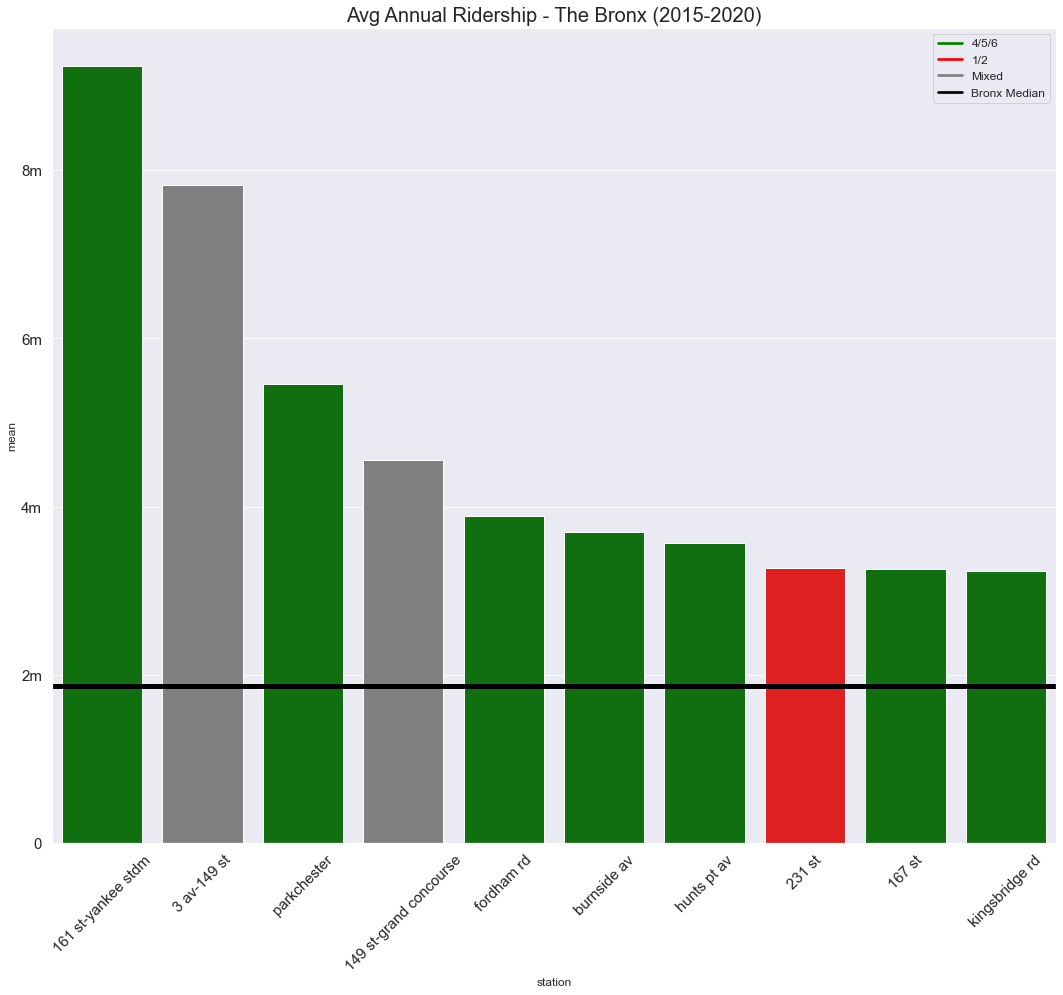

In [29]:
means_bx = top_bx[['station','mean']]

fig, ax = plt.subplots(figsize=(18, 15))

x = means_bx['station']
y = means_bx['mean']

sns.set_theme()
sns.barplot(x = x,y = y,palette=['green','gray','green','gray','green','green','green','red','green','green']).axhline(
bx_df['median'].median(),linewidth=5,color='black')
ax.set_yticklabels(['0','2m','4m','6m','8m','10m'],fontsize=15)
ax.set_xticklabels(['161 st-yankee stdm', '3 av-149 st','parkchester','149 st-grand concourse',
                   'fordham rd','burnside av','hunts pt av','231 st','167 st','kingsbridge rd'],
                   fontsize=15,rotation=45)
ax.set_title('Avg Annual Ridership - The Bronx (2015-2020)',fontsize=20)
leg = ax.legend(labels=['4/5/6','1/2','Mixed','Bronx Median'],loc='upper right',fontsize=12);
leg.legendHandles[0].set_color('green')
leg.legendHandles[1].set_color('red')
leg.legendHandles[2].set_color('gray')
leg.legendHandles[3].set_color('black')
plt.show();

## Queens

In [30]:
qns_df = irt.loc[irt['boro']=='Q']
qns_df['median'] = qns_df[['2015','2016','2017','2018','2019','2020']].median(axis=1)
top_qns = qns_df.sort_values('mean',ascending=False)[:10]
top_qns = top_qns[['station','mean']]
warnings.filterwarnings('ignore')

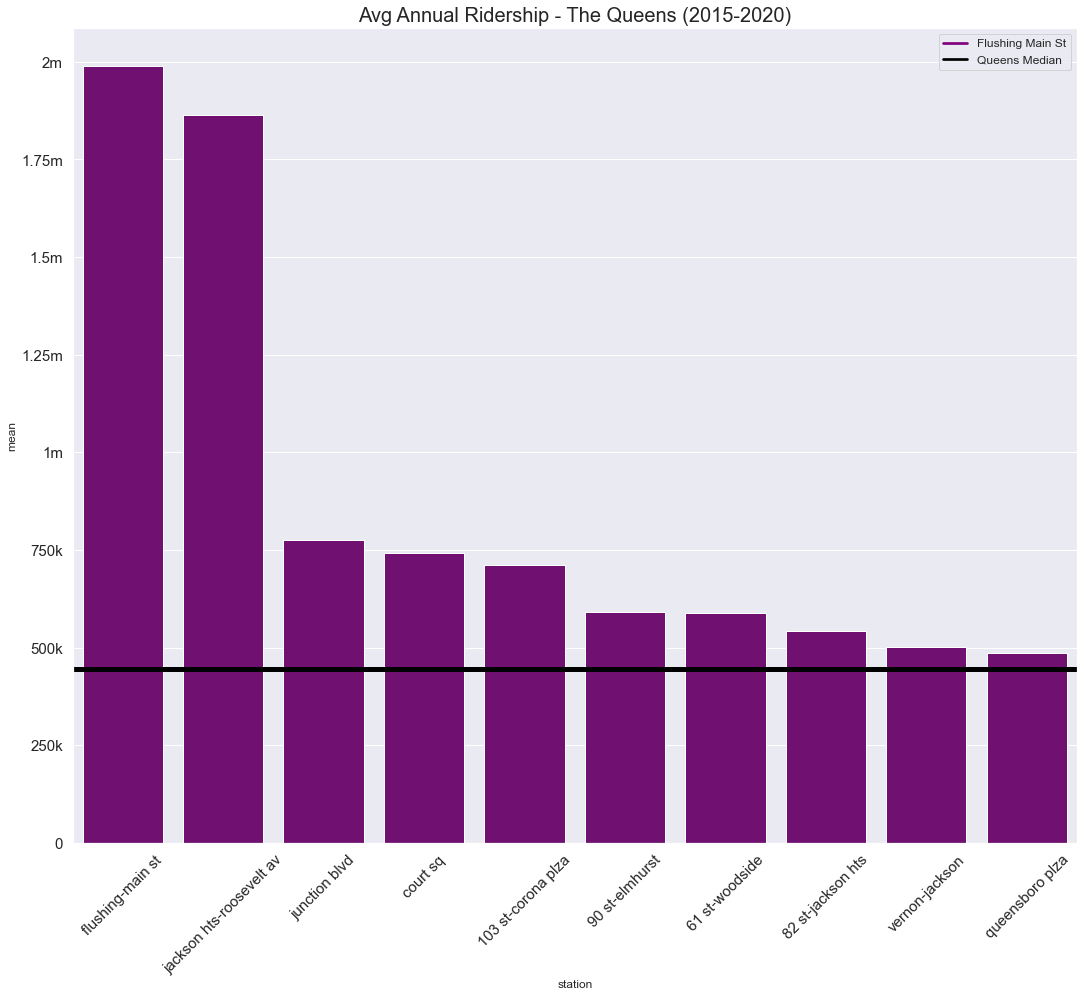

In [31]:
means_qns = top_qns[['station','mean']]

fig, ax = plt.subplots(figsize=(18, 15))

x = means_qns['station']
y = means_qns['mean']


sns.set_theme()
sns.barplot(x = x,y = y,palette=['purple']).axhline(
qns_df['median'].median(),linewidth=5,color='black')
ax.set_yticklabels(['0','250k','500k','750k','1m','1.25m','1.5m','1.75m','2m'],fontsize=15)
ax.set_xticklabels(['flushing-main st', 'jackson hts-roosevelt av','junction blvd','court sq',
                    '103 st-corona plza','90 st-elmhurst','61 st-woodside','82 st-jackson hts',
                    'vernon-jackson','queensboro plza'],
                   fontsize=15,rotation=45)
ax.set_title('Avg Annual Ridership - The Queens (2015-2020)',fontsize=20)
leg = ax.legend(labels=['Flushing Main St','Queens Median'],loc='upper right',fontsize=12);
leg.legendHandles[0].set_color('purple')
leg.legendHandles[1].set_color('black')
plt.show();

## Overall

In [32]:
irt['median'] = irt[['2015','2016','2017','2018','2019','2020']].median(axis=1)
top_ovl = irt.sort_values('mean',ascending=False)[:10]
warnings.filterwarnings('ignore')

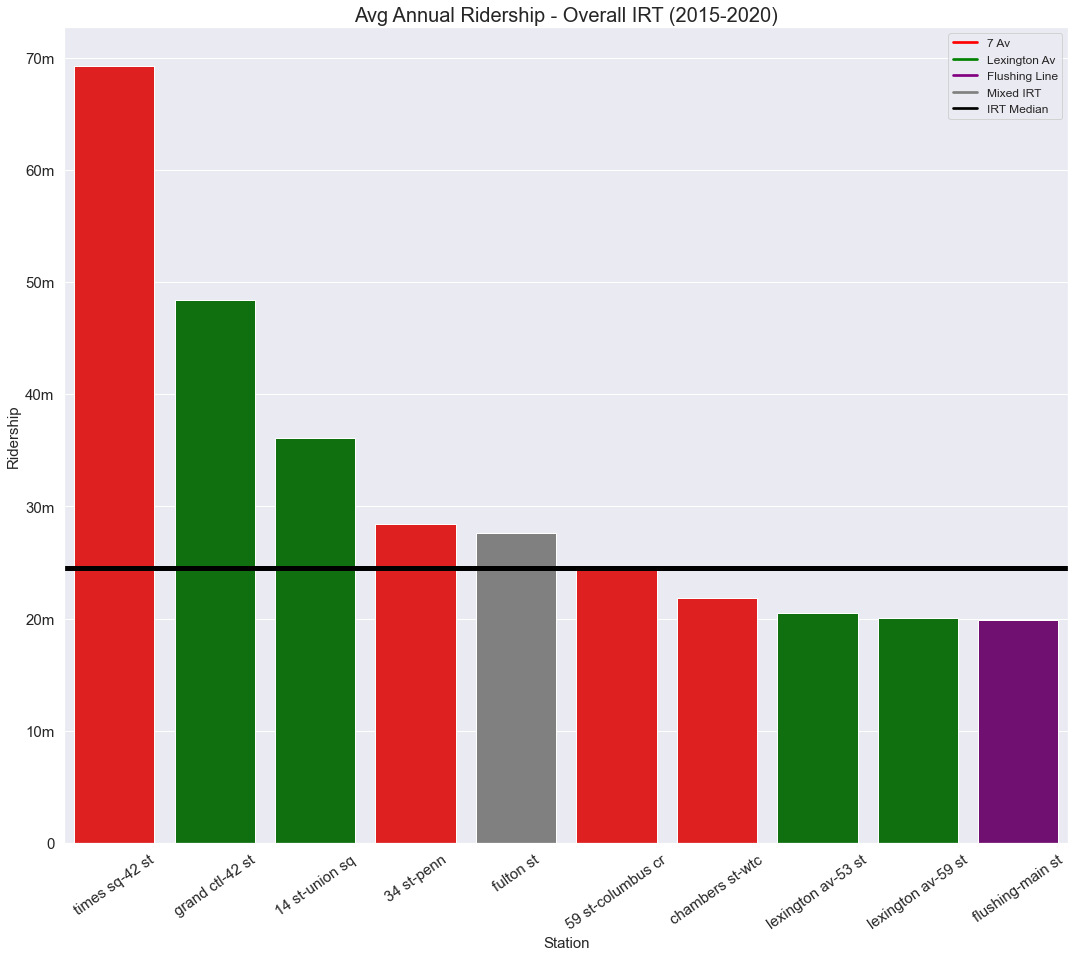

In [33]:
means_ovl = top_ovl[['station','mean']]

fig, ax = plt.subplots(figsize=(18, 15))

x = top_ovl['station']
y = top_ovl['mean']


sns.set_theme()
sns.barplot(x = x,y = y,palette=['red','green','green','red','gray','red','red','green','green','purple']).axhline(
top_ovl['median'].median(),linewidth=5,color='black')
ax.set_yticklabels(['0','10m','20m','30m','40m','50m','60m','70m'],fontsize=15)
ax.set_xticklabels(['times sq-42 st', 'grand ctl-42 st','14 st-union sq','34 st-penn','fulton st',
                    '59 st-columbus cr','chambers st-wtc','lexington av-53 st','lexington av-59 st','flushing-main st'],
                    fontsize=15,rotation=35)
ax.set_title('Avg Annual Ridership - Overall IRT (2015-2020)',fontsize=20)
ax.set_xlabel('Station',fontsize=15)
ax.set_ylabel('Ridership',fontsize=15)
leg = ax.legend(labels=['7 Av','Lexington Av','Flushing Line','Mixed IRT','IRT Median'],loc='upper right',fontsize=12);
leg.legendHandles[0].set_color('red')
leg.legendHandles[1].set_color('green')
leg.legendHandles[2].set_color('purple')
leg.legendHandles[3].set_color('gray')
leg.legendHandles[4].set_color('black')
plt.show();

# For Future Use

In [34]:
stations = ['103 st (1)', '103 st (6)', '103 st-corona plza (7)',
             '110 st (6)', '111 st (7)', '116 st (2/3)', '116 st (6)',
             '116 st-columbia (1)', '125 st (2/3)', '125 st (4/5/6)', '135 st (2/3)', '137 st-city clg (1)',
             '138 st-grand concourse (4/5)', '14 st-7 av (1/2/3/F/L/M)', '14 st-union sq (4/5/6/L/N/Q/R/W)', '145 st (1)',
             '145 st (3)', '149 st-grand concourse (2/4/5)', '157 st (1)', '161 st-yankee stdm (4/B/D)', '167 st (4)',
             '168 st-broadway (1/A/C)', '170 st (4)', '174 st (2/5)', '176 st (6)', '18 st (1)', '181 st (1)', '183 st (4)',
             '191 st (1)', '207 st (1)', '215 st (1)', '219 st (2/5)', '225 st (2/5)', '23 st (1)', '23 st (6)',
             '231 st (1)', '233 st (2/5)', '238 st (1)', '28 st (1)', '28 st (6)', '3 av-138 st (6)', '3 av-149 st (2/5)',
             '33 st (6)', '33 st-rawson st (7)', '34 st-hudson yd (7)', '34 st-penn sta (1/2/3/A/C/E)', '40 st-lowery st (7)',
             '42 st bryant pk-5 av (7/B/D/F/M)', '46 st-bliss st (7)', '50 st (1)', '52 st-lincoln (7)',
             'lexington av-59 st (4/5/6/N/Q/R/W)','59 st-columbus cr (1/A/B/C/D)',
             '61 st-woodside (7)', '66 st-lincoln ctr (1)', '68 st-hunter clg (6)',
             '69 st-fisk av (7)', '72 st (1/2/3)', '77 st (6)', '79 st (1)',
             '82 st-jackson hts (7)', '86 st (1)', '86 st (4/5/6)', '90 st-elmhurst (7)', '96 st (1/2/3)', '96 st (6)',
             'allerton av (2/5)', 'astor pl (6)', 'atlantic av-barclays ctr (2/3/4/5/B/D/N/Q/R)', 'baychester av (5)',
             'bedford pk blvd (4)', 'bergen st (2/3)', 'beverly rd (2/5)', 'borough hall-court st (2/3/4/5/R)',
             'bowling green (4/5)', 'broadway-lafayette/bleecker st (6/B/D/F/Q)',  'bronx pk east (2/5)', 'brook av (6)',
             'brooklyn bridge-city hall (4/5/6/J/Z)', 'buhre av (6)', 'burke av (2/5)', 'burnside av (4)','canal st (1)',
             'canal st (6/J/N/Q/R/W/Z)', 'castle hill av (6)', 'cathedral pkwy-110 st (1)','chambers st-wtc (1/2/3/A/C/E/R/W)',
             'christopher st (1)', 'church av (2/5)', 'clark st (2/3)', 'court sq (7)', 'crown hts-utica av (3/4)',
             'ctl park n-110 st (2/3)', 'cypress av (6)', 'dyckman st (1)', 'e 143 st (6)', 'e 149 st (6)', 'e 180 st (2/5)',
             'eastchester dyre av (5)', 'eastern pkwy (2/3)', 'elder av (6)',  'flatbush av-bk clg (2/5)', 'flushing-main st (7)',
             'fordham rd (4)', 'franklin av (2/3/4/5/S)', 'franklin st (1)', 'freeman st (2/5)', 'fulton st (2/3/4/5/A/C/J/Z)',
             'grand army plza (2/3)', 'grand ctl-42 st (4/5/6/7)', 'gun hill rd (2/5)', 'gun hill rd (5)', 'harlem-148 st (3)',
             'houston st (1)', 'hoyt st (2/3)', 'hunters pt (7)', 'hunts pt av (6)', 'intervale av (2/5)', 'jackson av (2/5)',
             'jackson hts-roosevelt av (7/E/F/M/R)', 'junction blvd (7)', 'junius st (3)',
             'kingsbridge rd (4)', 'kingston av (4)', 'lexington av-53 st (6/E/M)',
             'longwood av (6)',  'marble hill-225 st (1)', 'mets-willets pt (7)', 'middletown rd (6)', 'morris pk (5)',
             'morrison av (6)', 'moshulu pkwy (4)', 'mt eden av (4)', 'nereid av (2/5)', 'nevins st (2/3/4/5)','new lots av (3)',
             'newkirk av (2/5)', 'nostrand av (3)', 'park pl (2/3/A/C/E)', 'parkchester (6)', 'pelham bay pk (6)',
             'pelham pkwy (2/5)', 'pelham pkwy (5)', 'pennsylvania av (3)',  'president st (2/5)', 'prospect av (2/5)',
             'queensboro plza (7/N/Q/W)','rector st (1)', 'rockaway av (3)','saratoga av (3)', 'simpson st (2/5)',
             'south ferry (1/R/W)', 'spring st (6)', 'st lawrence av (6)', 'sterling st (2/5)','sutter av (3)',
             'times sq-42 st (1/2/3/7/A/C/E/N/Q/R/S/W)', 'van cortlandt park-242 st (1)', 'van siclen av (3)', 'vernon-jackson (7)',
             'wakefield-241 st (2)', 'wall st (2/3)', 'wall st (4/5)', 'west farm sq-e tremont (2/5)', 'westchester sq (6)',
              'whitlock av (6)', 'winthrop st (2/5)', 'woodlawn (4)', 'wtc-cortlandt (1)','zerega av (6)']

In [35]:
stations_outside = ['van cortlandt park-242 st (1)','238 st (1)','231 st (1)','marble hill-225 st (1)',
                   '215 st (1)','207 st (1)','dyckman st (1)','wakefield-241 st (2)','nereid av (2/5)',
                   '233 st (2/5)','225 st (2/5)','219 st (2/5)','gun hill rd (2/5)','burke av (2/5)','allerton av (2/5)',
                   'pelham pkwy (2/5)','bronx pk east (2/5)','e 180 st (2/5)','west farm sq-e tremont (2/5)','174 st (2/5)',
                   'freeman st (2/5)','simpson st (2/5)','intervale av (2/5)','prospect av (2/5)','jackson av (2/5)',
                   'sutter av (3)','saratoga av (3)','rockaway av (3)','junius st (3)','pennsylvania av (3)',
                   'van siclen av (3)','new lots av (3)','woodlawn (4)','mosholu pkwy (4)','bedford pk blvd (4)',
                   'kingsbridge rd (4)','fordham rd (4)','183 st (4)','burnside av (4)','176 st (4)','mt eden av (4)',
                   '170 st (4)','167 st (4)','161 st-yankee stdm (4/B/D)','eastchester dyre av (5)','baychester av (5)',
                   'gun hill rd (5)','pellham pkwy (5)','morris pk (5)','pelham bay pk (6)','buhre av (6)','middletown rd (6)',
                   'westchester sq (6)','zerega av (6)','castle hill av (6)','parkchester (6)','st lawrence av (6)',
                   'morrison av (6)','elder av (6)','whitlock av (6)','mets-willets pt (7)','111 st (7)',
                   '103 st-corona plza (7)','90 st-elmhurst (7)', '82 st-jackson hts (7)','69 st-fisk av (7)',
                   '61 st-woodside (7)','52 st-lincoln (7)','46 st-bliss st (7)','40 st-lowery st (7)','33 st-rawson st (7)',
                   'queensboro plza (7/N/Q/W)','court sq (7)']

stations_express = ['96 st (1/2/3)','72 st (1/2/3)','times sq-42 st (1/2/3/7/A/C/E/N/Q/R/S/W)','34 st-penn sta (1/2/3/A/C/E)',
                   '14 st-7 av (1/2/3/F/L/M)','chambers st-wtc (1/2/3/A/C/E/R/W)','3 av-149 st (2/5)','149 st-grand concourse (2/4/5)',
                   'borough hall-court st (2/3/4/5/R)','atlantic av-barclays ctr (2/3/4/5/B/D/N/Q/R)',
                   'franklin av (2/3/4/5/S)','crown hts-utica av (3/4)','125 st (4/5/6)','86 st (4/5/6)',
                    'lexington av-59 st (4/5/6/N/Q/R/W)','grand ctl-42 st (4/5/6/7)',
                    '14 st-union sq (4/5/6/L/N/Q/R/W)','brooklyn bridge-city hall (4/5/6/J/Z)',
                   'fulton st (2/3/4/5/A/C/J/Z)','wall st (4/5)','bowling green (4/5)','parkchester (6)','hunts pt av (6)',
                   '3 av-138 st (6)','flushing-main st (7)','mets-willets pt (7)','junction blvd (7)','61 st-woodside (7)',
                   'queensboro plza (7/N/Q/W)','court sq (7)','hunters pt (7)','vernon-jackson (7)',]

stations_ada = ['231 st (1)','dyckman st (1)','96 st (1/2/3)','66 st-lincoln ctr (1)','59 st-columbus cr (1/A/B/C/D)',
               'times sq-42 st (1/2/3/7/A/C/E/N/Q/R/S)','34 st-penn sta (1/2/3/A/C/E)','chambers st-wtc (1/2/3/A/C/E/R/W)',
               'south ferry (1/R/W)','233 st (2/5)','gun hill rd (2/5)','e 180 st (2/5)',
               'simpson st (2/5)','3 av-149 st (2/5)','135 st (2/3)','fulton st (2/3/4/5/A/C/J/Z)',
               'borough hall-court st (2/3/4/5/R)','atlantic av-barclays ctr (2/3/4/5/B/D/N/Q/R)','eastern pkwy (2/3)',
               'church av (2/5)','flatbush av-bk clg (2/5)','crown hts-utica av (3/4)','fordham rd (4)',
               '161 st-yankee stdm (4/B/D)','125 st (4/5/6)','86 st (4/5/6)','grand ctl-42 st (4/5/6/7)',
               'brooklyn bridge-city hall (4/5/6/J/Z)','bowling green (4/5)','gun hill rd (5)','pelham bay pk (6)',
               'hunts pt av (6)','28 st (6)','broadway-lafayette/bleecker st (6/B/D/F/Q)','canal st (6/J/N/Q/R)',
               'flushing-main st (7)','mets-willets pt (7)','junction blvd (7)','jackson hts-roosevelt av (7/E/F/M/R)',
               '69 st-fisk av (7)','61 st-woodside (7)','court sq (7)','lexington av-53 st (6/E/M)']

stations_terminal = ['van cortlandt park-242 st (1)','south ferry (1/R/W)','wakefield-241 st (2)','flatbush av-bk clg (2/5)',
                    'harlem-148 st (3)','new lots av (3)','woodlawn (4)','crown hts-utica av (3/4)','eastchester dyre av (5)',
                    'pelham bay pk (6)','brooklyn bridge-city hall (4/5/6/J/Z)','flushing-main st (7)',]